In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
class Bandit:
    def __init__(self, m, upperbound):
        self.m = m
        self.mean = upperbound
        self.N = 0
     
    # simulate pulling bandit arms 
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + (1/self.N) * x

In [80]:
class BayesianBandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.predicted_mean = 0
        self.lambda_ = 1
        self.sum_x = 0
        self.tau = 1

     
    # simulate pulling bandit arms 
    def pull(self):
        return np.random.randn() + self.true_mean
    
    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean
    
    def update(self, x):
        # taue is assumed to be 1
        self.lambda_ += 1
        self.sum_x += x
        self.predicted_mean = self.tau * self.sum_x /self.lambda_


In [81]:
def ucb(mean, n, n_j):
    if n_j == 0:
        return float('inf')
    return mean + np.sqrt(2 * np.log(n) / n_j)

In [82]:
def run_experiment_decaying_epsilon_greedy(m1, m2, m3, N):
    bandits = [Bandit(m1, 0), Bandit(m2, 0), Bandit(m3, 0)]
    data = np.empty(N)
    
    for i in range(N):
        p =  np.random.random()
        
        if p < 1.0/(i + 1) :
            j = np.random.choice(3)
        else :
            j = np.argmax([b.mean for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x    # end of loop
    
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    plt.plot(cumulative_average)
    
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average        

In [83]:
def run_experiment_ucb(m1, m2, m3, N):
    bandits = [Bandit(m1, 0), Bandit(m2, 0), Bandit(m3, 0)]
    data = np.empty(N)
    
    for i in range(N):

        j = np.argmax([ucb(b.mean, i, b.N) for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x    # end of loop
    
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    plt.plot(cumulative_average)
    
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average

In [84]:
def run_experiment_oiv(m1, m2, m3, N, optimistic_initial_value = 10):
    bandits = [Bandit(m1, optimistic_initial_value), Bandit(m2, optimistic_initial_value), Bandit(m3, optimistic_initial_value)]
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.mean for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x    # end of loop
    
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    plt.plot(cumulative_average)
    
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average 

In [85]:
def run_experiment_bayesian(m1, m2, m3, N):
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]
    data = np.empty(N)
    
    for i in range(N):

        j = np.argmax([b.sample() for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x    # end of loop
    
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    plt.plot(cumulative_average)
    
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
            
    return cumulative_average

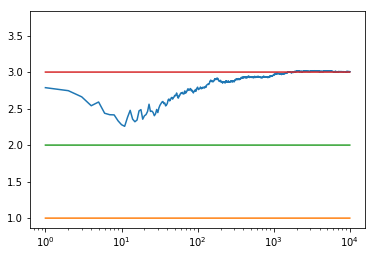

0.8496754098938541
2.910047813599805
3.006495347543844


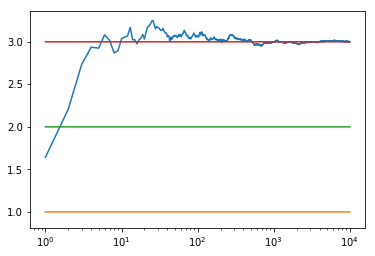

0.9269092688732103
2.3576296718574183
3.0013080074092144


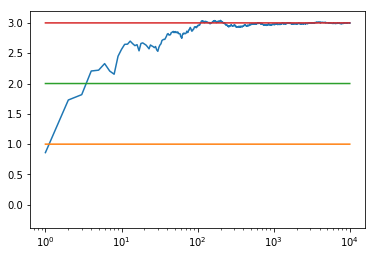

0.4636000509881098
1.7934193705892096
3.000300391913989


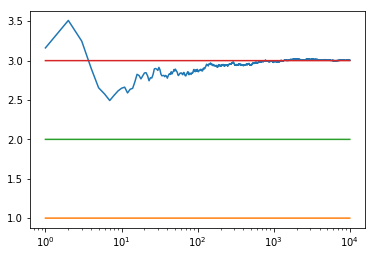

In [86]:
if __name__ == '__main__':
    m1 = 1.0
    m2 = 2.0
    m3 = 3.0
    e_decaying_eps = run_experiment_decaying_epsilon_greedy(m1, m2, m3, 10000)
    e_oiv = run_experiment_oiv(1.0, 2.0, 3.0, 10000)
    e_ucb = run_experiment_ucb(m1, m2, m3, 10000)
    e_bayesian = run_experiment_bayesian(1.0, 2.0, 3.0, 10000)

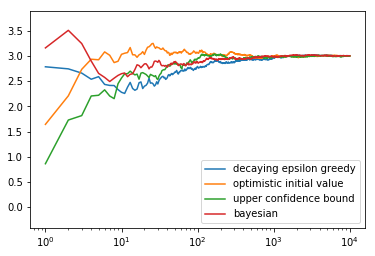

In [87]:
#log scale plot
plt.plot(e_decaying_eps, label='decaying epsilon greedy')
plt.plot(e_oiv, label='optimistic initial value')
plt.plot(e_ucb, label='upper confidence bound')
plt.plot(e_bayesian, label='bayesian')

plt.legend()
plt.xscale('log')
plt.show()

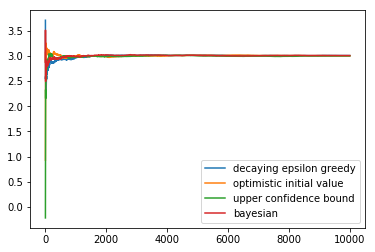

In [88]:
#linear scale
plt.plot(e_decaying_eps, label='decaying epsilon greedy')
plt.plot(e_oiv, label='optimistic initial value')
plt.plot(e_ucb, label='upper confidence bound')
plt.plot(e_bayesian, label='bayesian')

plt.legend()
plt.show()